# Shopify Winter 2021 Data Science Challenge

First, we must load in the data to further analyze why the Average Order Value is abnormally high.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the dataset using pandas
dataset = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

To start it would be best to visualize the data to understand where the discrepancies may be and what is causing the increase in AOV. The data may potentially be skewed due to outliers in the data which we could further analyze if this is the case.

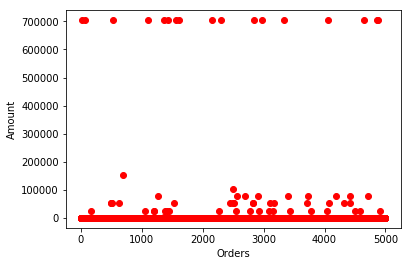

In [2]:
#Plot the order amount of each order
df = dataset.groupby('order_id')['order_amount'].agg(['sum'])
df = df.reset_index()
plt.plot(df['order_id'], df['sum'], 'ro')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

Already we can see that most of the orders sit around a lower value where the line is formed. We can see a few larger numbers above the line, but it doesn't seem too much as an outlier. The top of the graph though, shows us a consistently high order_amount repeated multiple times. This could potentially be the outlier which is skewing the data.

We could look into this further and see the total items being purchased in each order to see if any inconsistency in the data exists. We will find the orders where the amount was abnormally large.

In [3]:
#Find max of order amount column
print(dataset['order_amount'].max())

704000


We find the maximum value of the order_amount column and want to find other related information about this column and see if it repeats based on what we know from the graph above.

In [4]:
#Find the row(s) that have order_amount = 704000
skewedData = dataset.loc[dataset['order_amount'] == 704000]
print(skewedData)

      order_id  shop_id  user_id  order_amount  total_items payment_method  \
15          16       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
520        521       42      607        704000         2000    credit_card   
1104      1105       42      607        704000         2000    credit_card   
1362      1363       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
1562      1563       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
2153      2154       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
2969      2970       42      607        704000         2000    c

We confirm that these orders are identical in terms of order amount, total items, shop ID, and user ID. This confirms that this data is identical and there is some issue with this data. We can also look at the total item discrepancy to see another abnormal value.

In [5]:
#Count occurences of total item counts
print(dataset['total_items'].value_counts().sort_index())

1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
Name: total_items, dtype: int64


We see that common values range from 1 - 4, with some orders a few numbers above. We see a huge jump from 8 orders to 2000 though which explains why there may be this discrepancy. 

In [6]:
orderAmountSkewed = dataset.loc[dataset['total_items'] == 2000]
print(orderAmountSkewed['shop_id'].value_counts().sort_index())
print(orderAmountSkewed['user_id'].value_counts().sort_index())

42    17
Name: shop_id, dtype: int64
607    17
Name: user_id, dtype: int64


Finally we see that the shop id and the user id are also the same across all transactions at this value, which singles it out giving us a red flag in the data.

QUESTION 1.A)
There are 17 orders where 2000 items are being purchased. This is a repeated value signalling a red flag with this transcation. This could be a mistake, automated, financial scheme, etc. and this is heavily skewing the data which gives us the high AOV.

QUESTION 1.B)
Since we know that the average is heavily skewed we could take the median instead giving us a more accurate representation of the value. It will provide a value that sits in the middle and is not heavily influenced by a skewed piece of data.

We could also potentially remove the newly found outlier for a better AOV calculation.

In [7]:
removedOutliers = dataset[dataset.total_items != 2000]
orderAmount = removedOutliers['order_amount'].mean()
print("AOV = " + str(orderAmount))

AOV = 754.0919125025085


With our outliers removed we have a better looking AOV, but the MEDIAN still seems like a better option.

Question 1.C)

In [8]:
print(dataset.loc[:, 'order_amount'].median())

284.0


Therefore our MEDIAN would be 284.0 which definitely seems to give a better representation of the value of the products.